In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import polars as pl


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


In [2]:
chunksize = 10 ** 6
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',chunksize=chunksize):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)],axis = 0,ignore_index = True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.
NUMBER 6 is done.
NUMBER 7 is done.
NUMBER 8 is done.
NUMBER 9 is done.
NUMBER 10 is done.
NUMBER 11 is done.
NUMBER 12 is done.
NUMBER 13 is done.
NUMBER 14 is done.
NUMBER 15 is done.
NUMBER 16 is done.
NUMBER 17 is done.
NUMBER 18 is done.
NUMBER 19 is done.
NUMBER 20 is done.
NUMBER 21 is done.
NUMBER 22 is done.
NUMBER 23 is done.
NUMBER 24 is done.
NUMBER 25 is done.
NUMBER 26 is done.
NUMBER 27 is done.
NUMBER 28 is done.
NUMBER 29 is done.
NUMBER 30 is done.
NUMBER 31 is done.
NUMBER 32 is done.
NUMBER 33 is done.
NUMBER 34 is done.
NUMBER 35 is done.
NUMBER 36 is done.
NUMBER 37 is done.
NUMBER 38 is done.
NUMBER 39 is done.
NUMBER 40 is done.
NUMBER 41 is done.


In [3]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [4]:
train.isnull().sum()


id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                404290 non-null  float64
 1   click             404290 non-null  int64  
 2   hour              404290 non-null  int64  
 3   C1                404290 non-null  int64  
 4   banner_pos        404290 non-null  int64  
 5   site_id           404290 non-null  object 
 6   site_domain       404290 non-null  object 
 7   site_category     404290 non-null  object 
 8   app_id            404290 non-null  object 
 9   app_domain        404290 non-null  object 
 10  app_category      404290 non-null  object 
 11  device_id         404290 non-null  object 
 12  device_ip         404290 non-null  object 
 13  device_model      404290 non-null  object 
 14  device_type       404290 non-null  int64  
 15  device_conn_type  404290 non-null  int64  
 16  C14               40

In [6]:
train.describe()


,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042900e+05,404290.000000,4.042900e+05,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,9.217814e+18,0.169512,1.410256e+07,1004.968800,0.289688,1.015588,0.330053,18835.019793,318.830533,60.113770,2111.856551,1.432417,227.263536,53216.909298,83.281259
std,5.333150e+18,0.375204,2.967019e+02,1.091584,0.506429,0.526100,0.853591,4963.852734,20.953539,47.426752,610.045634,1.324821,351.148101,49956.850771,70.222907
min,8.721124e+12,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.592458e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.218449e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.384145e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000
max,1.844668e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


From below plot we can see that there exists imbalanced data of the target value.

click
0    0.830488
1    0.169512
Name: proportion, dtype: float64




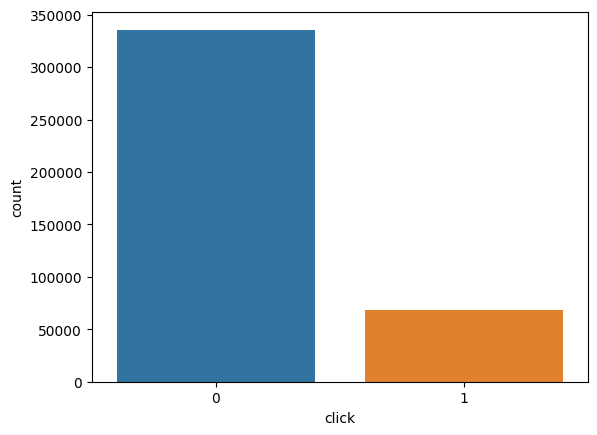

In [8]:
print(train.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x='click', data=train)
plt.show()

The plot illustrates the variation in the average click-through rate over different hours of the day (hour_time). The x-axis represents the hour of the day (ranging from 0 to 23), and the y-axis shows the average click rate.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour_time', ylabel='click'>

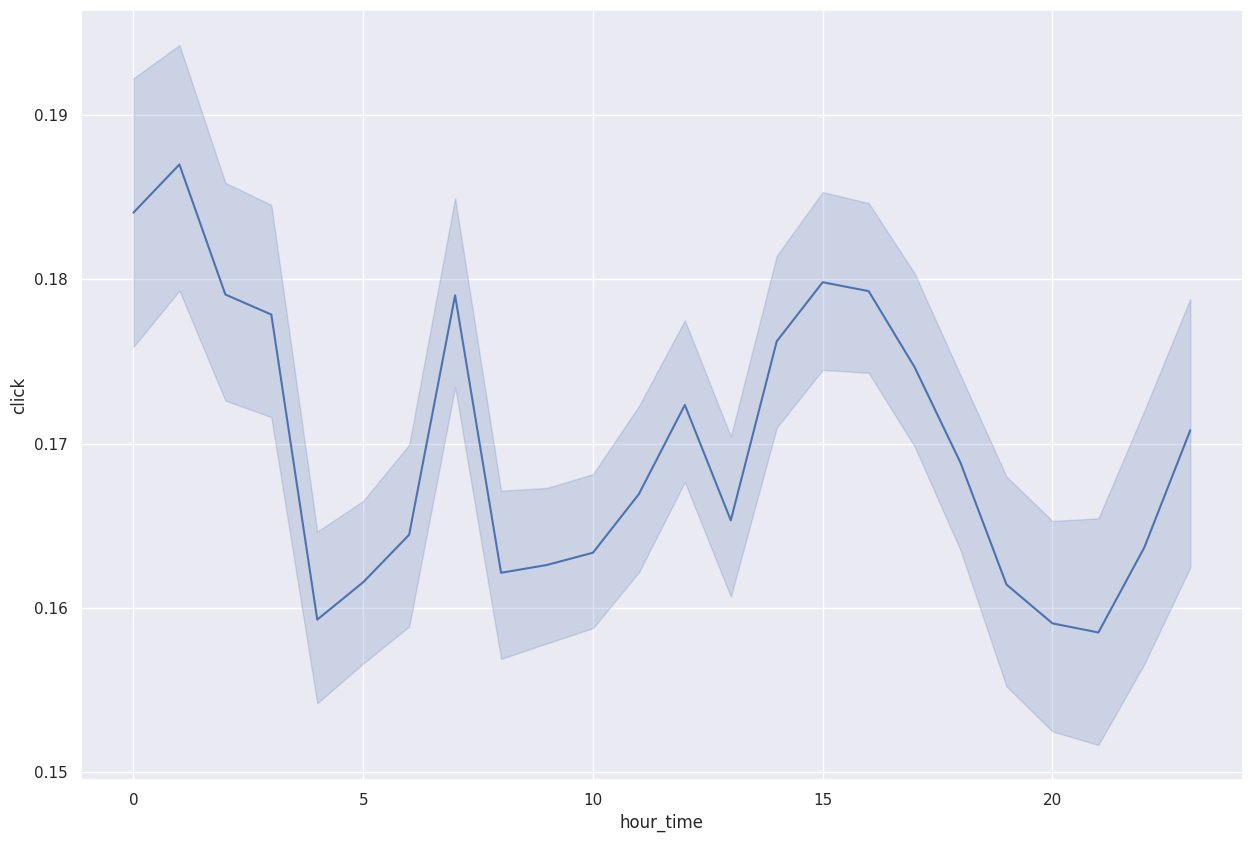

In [29]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour_time', y='click')

As we know id columns which is not usable for model in the training process therefore we drop all of them. 

In [9]:
train = train.drop(columns=['id', 'site_id', 'app_id', 'device_id', 'device_model'])
train.columns

Index(['click', 'hour', 'C1', 'banner_pos', 'site_domain', 'site_category',
       'app_domain', 'app_category', 'device_ip', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [10]:
numerical = []
categorical = []

for col in (train.columns):
    if train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

categorical columns =  ['site_domain', 'site_category', 'app_domain', 'app_category', 'device_ip']


## Feature Engineering
hour encoded as YYMMDDHH and hour of day, day, month, weekday columns extracted.

In [11]:
train['hour'].value_counts()

hour
14102209    4544
14102210    4377
14102813    4281
14102212    4051
14102814    3842
            ... 
14102419     340
14102423     247
14102420     239
14102421     181
14102422     136
Name: count, Length: 240, dtype: int64

In [12]:
train['hour'] = pd.to_datetime(train['hour'], format='%y%m%d%H')
train['hour_time'] = train['hour'].dt.hour
train['day'] = train['hour'].dt.day
train['month'] = train['hour'].dt.month
train['weekday'] = train['hour'].dt.dayofweek


As there is a high correlation between device_type and C1 column and banner_pos, site_category i merged as a one column in order to get better performance and not negatively influence model performance in the training.

In [13]:
train['device_C1'] = train['device_type'].astype(str) + "_" + train['C1'].astype(str)


In [14]:
train['banner_site_cat'] = train['banner_pos'].astype(str) + "_" + train['site_category'].astype(str)

In [15]:
from sklearn.preprocessing import LabelEncoder

for col in train.select_dtypes(include='object').columns:
    train[col] = LabelEncoder().fit_transform(train[col])

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


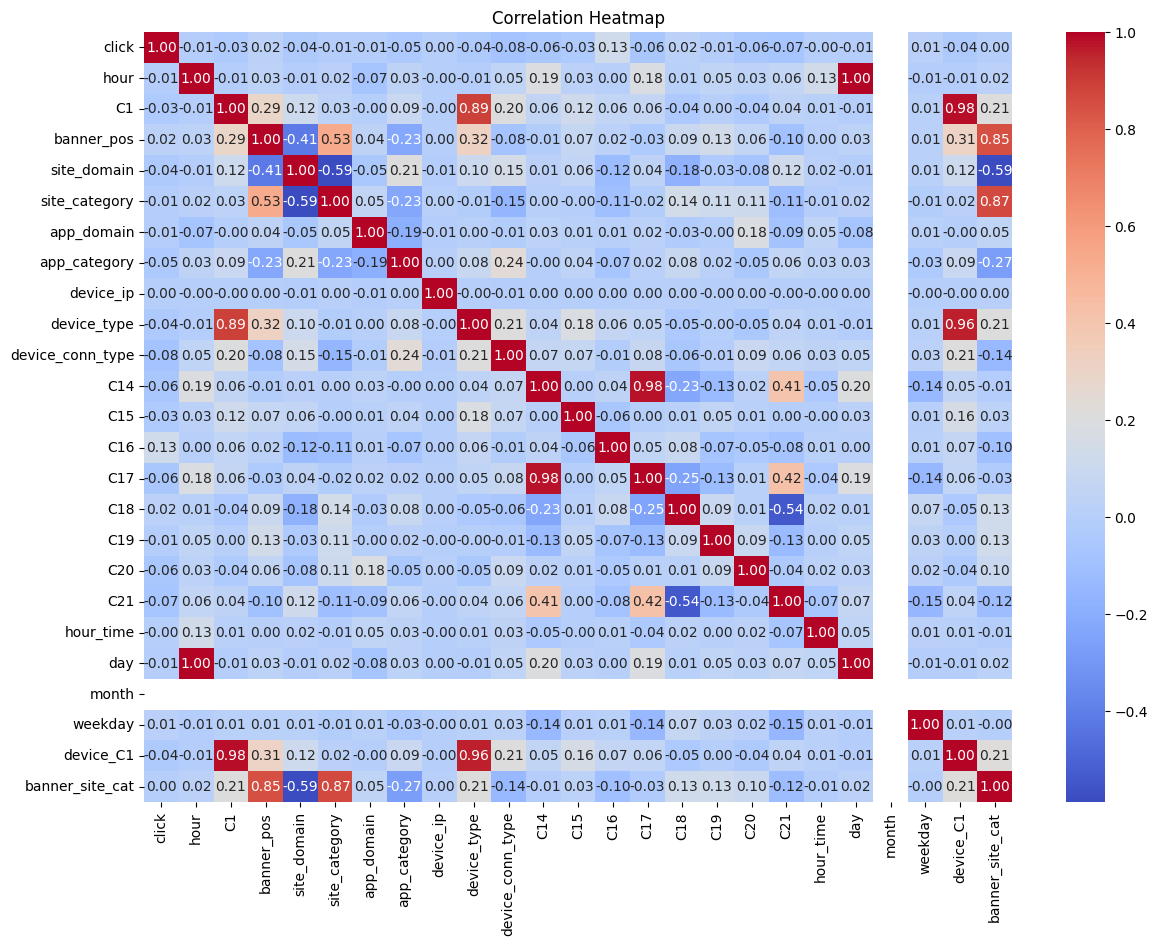

In [16]:
corr = train.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
train['is_weekend'] = (train['weekday'] >= 5).astype(int)


Dropped redundant or highly correlated columns using correlation analysis:  hour, day, weekday, month, C17, C21

In [18]:
cols_to_drop = ['hour', 'day', 'weekday', 'month', 'C17', 'C21', 'banner_pos', 'site_category', 'device_type', 'C1']
train.drop(columns=[col for col in cols_to_drop if col in train.columns], inplace=True)

In [19]:
train.columns

Index(['click', 'site_domain', 'app_domain', 'app_category', 'device_ip',
       'device_conn_type', 'C14', 'C15', 'C16', 'C18', 'C19', 'C20',
       'hour_time', 'device_C1', 'banner_site_cat', 'is_weekend'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['click'])  
y = train['click']                

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

## Model Training
1. Used LightGBM, which handles categorical features and imbalance well.
2. Set LightGBM's is_unbalance=True to adjust for CTR imbalance
3. Trained using binary_logloss and auc as evaluation metrics.

In [21]:
import lightgbm as lgb

# Prepare LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = {
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt',
    'is_unbalance': True, 
    'verbosity': -1
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=200,
)

In [22]:
test = pd.read_csv('/kaggle/input/avazu-ctr-prediction/test.gz')
y_test = pd.read_csv('/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz')
test = test.merge(y_test, on='id')
test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,click
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,0,8330,320,50,761,3,175,100075,23,0.5
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,22676,320,50,2616,0,35,100083,51,0.5
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,22676,320,50,2616,0,35,100083,51,0.5
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,0,18648,320,50,1092,3,809,100156,61,0.5
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,0,23160,320,50,2667,0,47,-1,221,0.5


In [23]:
y_test.value_counts()

id                    click
18446743486797673703  0.5      1
12822605231091        0.5      1
13759018460678        0.5      1
20108242322613        0.5      1
20153274081018        0.5      1
                              ..
124070917566788       0.5      1
131448865417762       0.5      1
133541733242617       0.5      1
148280917115475       0.5      1
149640916026081       0.5      1
Name: count, Length: 4577464, dtype: int64

In [25]:
from sklearn.metrics import roc_auc_score, log_loss

y_pred = model.predict(X_val)
auc = roc_auc_score(y_val, y_pred)
logloss = log_loss(y_val, y_pred)

print(f"AUC-ROC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

AUC-ROC: 0.7300
Log Loss: 0.6040


## Model performance vizualizations
- From the bar chart displays total gain — a LightGBM metric indicating how much a feature contributes to reducing the model’s error during training.
- site-domain, C14, C16 and banner_site_cat indicate that where and how an ad is shown is highly predictive of user engagement.
- banner_site_cat ranks 4th shows that manually engineered combinations can match or outperform raw fields.


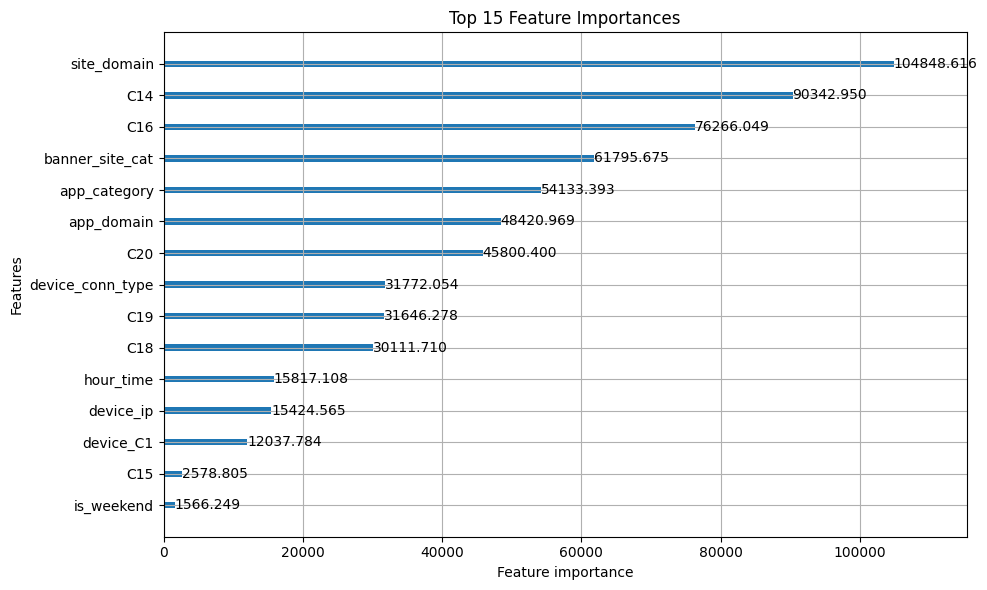

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

lgb.plot_importance(model, max_num_features=15, importance_type='gain', figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

The ROC curve metric in order to check our model performance. 
- The diagonal line represents random guessing (AUC = 0.5).
- The blue curve above the diagonal indicates better-than-random performance.
- An AUC of 0.73 indicates moderate predictive performance. That means there is room for improvement. The classifier may still struggle in some edge cases 

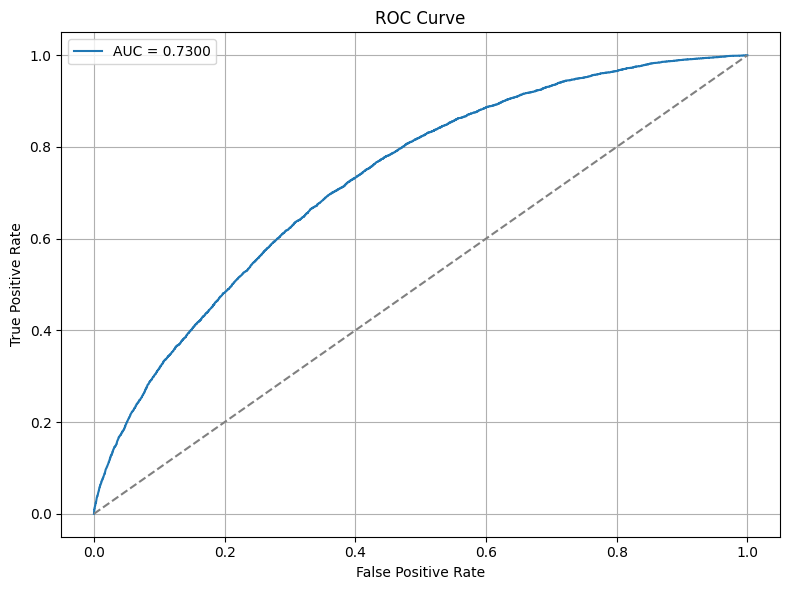

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()